In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/xiaoxuanliang/Desktop/STAT 520A/STAT-520A-Project/data/chr_1.csv')
#df

FileNotFoundError: [Errno 2] No such file or directory: '/Users/xiaoxuanliang/Desktop/STAT 520A/STAT-520A-Project/data/chr_1.csv'

In [ ]:
from sklearn.neighbors import KernelDensity
copy_data = df['copy'].dropna().values.reshape(-1, 1)
copy_data.shape
copy_data
print(len(copy_data))

In [ ]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(copy_data)
smooth = kde.score_samples(copy_data)
smooth

In [2]:
import matplotlib.pyplot as plt
plt.hist(kde.sample(10000), bins='auto')
plt.title("KDE Sample")
plt.show()

plt.hist(copy_data, bins='auto')
plt.title("Raw Data")
plt.show()

NameError: name 'kde' is not defined

In [17]:
df = pd.read_csv('../data/SA1015.csv')
df.head()


,chr,start,end,width,reads,gc,map,cor_gc,copy,valid,ideal,modal_curve,modal_quantile,cor_map,multiplier,state,cell_id,is_low_mappability
0,1.0,1,500000,500000,44,-1.000000,0.348523,NaN,NaN,False,False,NaN,NaN,NaN,2,2,SA1015-A95736A-R03-C04,True
1,1.0,500001,1000000,500000,35,-1.000000,0.770391,NaN,NaN,False,False,NaN,NaN,NaN,2,2,SA1015-A95736A-R03-C04,True
2,1.0,1000001,1500000,500000,109,0.598332,0.982072,0.901610,1.751604,True,False,120.894902,46.0,NaN,2,2,SA1015-A95736A-R03-C04,False
3,1.0,1500001,2000000,500000,85,0.539498,0.963004,0.841462,1.634753,True,True,101.014634,46.0,NaN,2,2,SA1015-A95736A-R03-C04,False
4,1.0,2000001,2500000,500000,91,0.594508,0.997066,0.761515,1.479435,True,True,119.498621,46.0,NaN,2,2,SA1015-A95736A-R03-C04,False


In [18]:
data_list = [df.loc[df['chr'] == chr] for chr in range(1,23)]
data_list[0]
for i in range(22):
    data_list[i].to_csv('../data/chr_' + str(i))

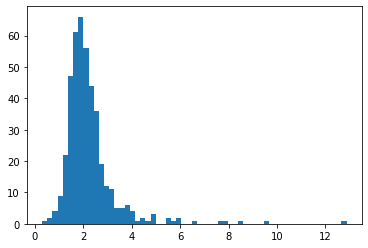

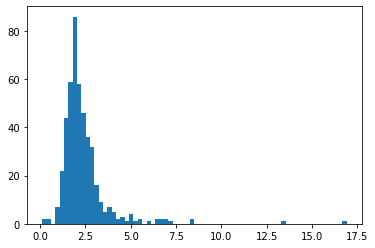

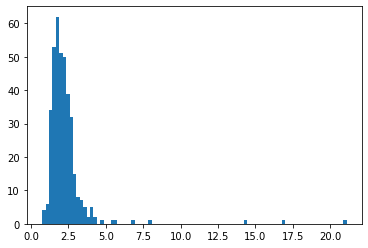

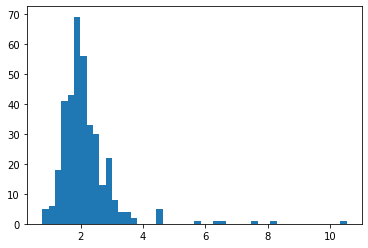

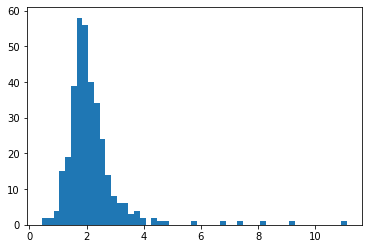

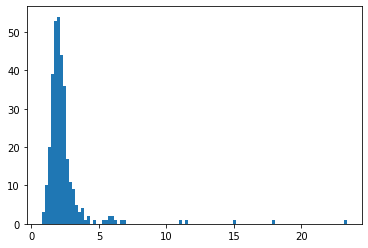

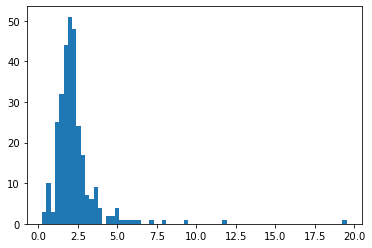

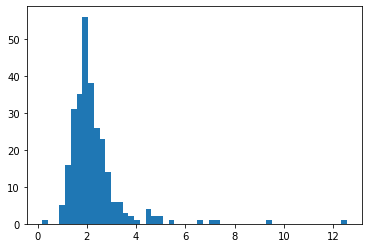

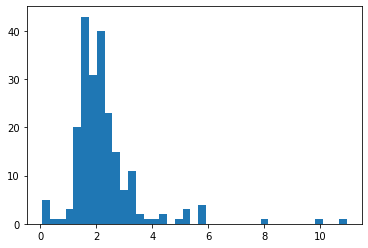

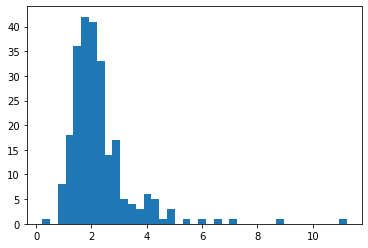

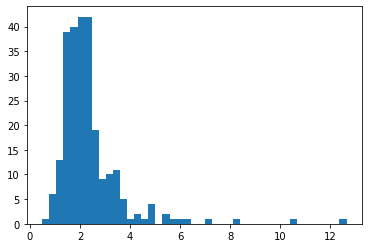

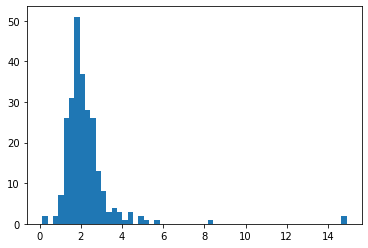

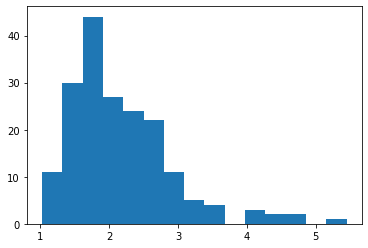

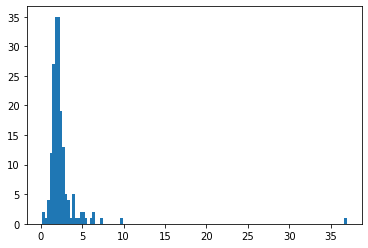

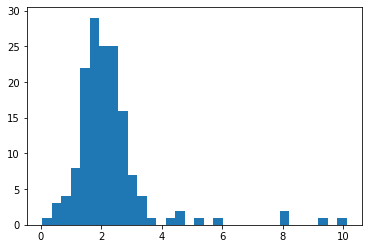

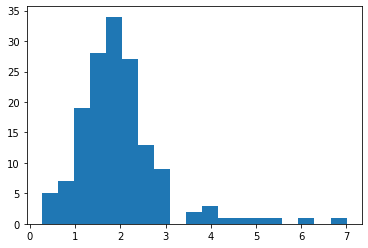

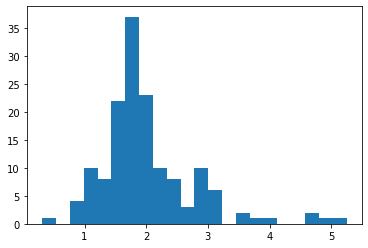

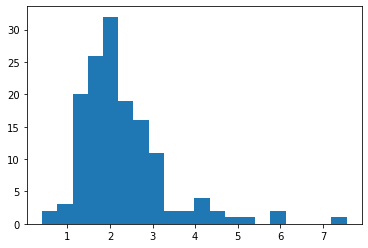

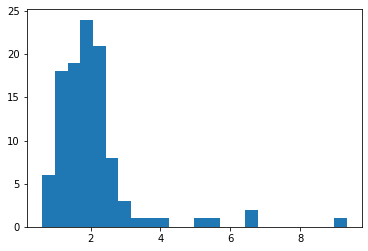

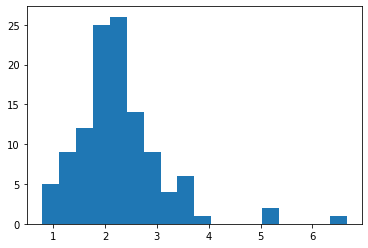

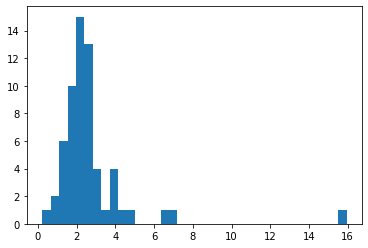

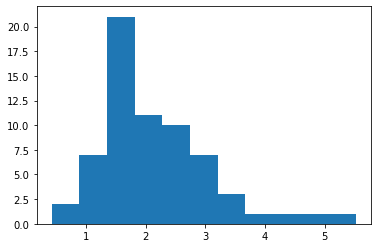

In [19]:
for i in range(22):
    plt.hist(data_list[i]['copy'].dropna().values.reshape(-1, 1), bins='auto')
    plt.show()


Forward message:
$$ M_j(z_j) = \sum_{z_{j-1}} p(z_j | z_{j-1}) p(x_j | z_j) M_{j-1} (z_{j-1}) $$

Backward message:
$$ V_j(z_j) = \sum_{z_{j+1}} p(z_{j+1} | z_j) p(x_{j+1} | z_{j+1}) V_{j+1} (z_{j+1})$$

Initial message:
$$ M_1(z_1) = p(z_1) p(x_1 | z_1), \qquad V_n(z_n) = 1 $$

Updates: 

$$ p(z_j|X) \propto M_j(z_j) V_j(z_j)\Rightarrow p(z_j|X) = \frac{M_j(z_j) V_j(z_j)}{\sum_c M_j(z_j = c)V_j(z_j = c)}$$

$$ p(z_{j-1}, z_j | X) \propto M_{j-1}(z_{j-1})V_j(z_j) p(z_j | z_{j-1}) p(x_j | z_j)$$

$$\Rightarrow p(z_{j-1} = m, z_j = n | X) =  \frac{M_{j-1}(z_{j-1} = m)V_j(z_j = n) p(z_j =n | z_{j-1} = m) p(x_j | z_j = n)}{\sum_m\sum_n M_{j-1}(z_{j-1} = m )V_j(z_j = n) p(z_j = n | z_{j-1} = m) p(x_j | z_j = n)}$$

In [1]:
import numpy as np

def compute_probabilities(log_probabilities):
    probabilities = np.exp(log_probabilities) / np.sum(np.exp(log_probabilities))  # make probs add up to 1

    if np.sum(probabilities) >= 0.99 and np.sum(probabilities) <= 1.01:
        return probabilities

    else:
        max = np.amax(log_probabilities)
        log_probabilities = log_probabilities - max
        valid_log_probabilities = np.empty(0)
        for i in len(log_probabilities):
            if log_probabilities[i] > -38:
                valid_log_probabilities = np.append(valid_log_probabilities, log_probabilities[i])

        if len(valid_log_probabilities) == 0:
            valid_log_probabilities = np.ones(len(log_probabilities)) / len(log_probabilities)

        return valid_log_probabilities

In [7]:
print(compute_probabilities(np.array([-1,-3,-5])))

log_probabilities = np.array([-1,-3,-5])
print(np.exp(log_probabilities) / np.sum(np.exp(log_probabilities)))

[0.86681333 0.11731043 0.01587624]
[0.86681333 0.11731043 0.01587624]


In [8]:
1e5

100000.0